\# Import the [urllib.request — extensible library for opening URLs](https://docs.python.org/3.0/library/urllib.request.html) module, the [urllib](https://docs.python.org/3/library/urllib.html) package is included in the standard library.

In [1]:
import urllib.request

\# Import [Python bindings](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_setup/py_intro/py_intro.html) for [OpenCV](http://docs.opencv.org/3.0-beta/index.html), a computer vision library. Install the package with "`pip3 install opencv-python`". Recomended reading [OpenCV-Python Tutorials](http://docs.opencv.org/trunk/d6/d00/tutorial_py_root.html).

In [2]:
import cv2

\# Import [NumPy](http://www.numpy.org), an efficient array manipulation library. Install with "`pip3 install numpy`".

In [3]:
import numpy as np

\# Import the [pyplot API](http://matplotlib.org/api/pyplot_api.html) module from [matplotlib](http://matplotlib.org/index.html) package, a library for 2D plotting. This will allow us to plot data, interactively. Install with "`pip3 install matplotlib`".

In [4]:
from matplotlib import pyplot as plt

\# [Configure matplotlib](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) for plotting inside Jupyter Notebook (not in external windows).

In [5]:
%matplotlib inline

\# Request the [lena image](https://en.wikipedia.org/wiki/Lenna). This function returns a file-like object.

In [6]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')

\# [Read](https://docs.python.org/3/tutorial/inputoutput.html) the complete "file" `HTTP_response` as a <a href="https://docs.python.org/3/library/functions.html#bytes">bytes object</a>. This (<a href="https://en.wikibooks.org/wiki/Python_Programming/Data_Types#Mutable_vs_Immutable_Objects">inmutable</a>) object  is transformed in a (<a href="https://en.wikibooks.org/wiki/Python_Programming/Data_Types#Mutable_vs_Immutable_Objects">mutable</a>) <a href="https://docs.python.org/3/library/functions.html#bytearray">bytearray object</a>, as the NumPy's [asarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html) (function) converter, requires. The final result is an [array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) object containing unsigned integers of 8 bits.

In [7]:
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)

\# [Decompress](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html) the content of the input array. Returns an [image object](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html).

In [8]:
BRG = cv2.imdecode(arr,-1)

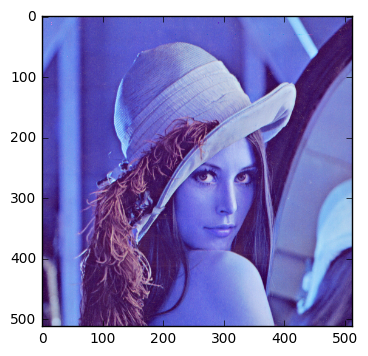

In [9]:
plt.imshow(BRG)
# print(BRG)

\# Convert the image from the BRG to the RGB [color space](http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor).

In [11]:
RGB = cv2.cvtColor(BRG, cv2.COLOR_BGR2RGB)

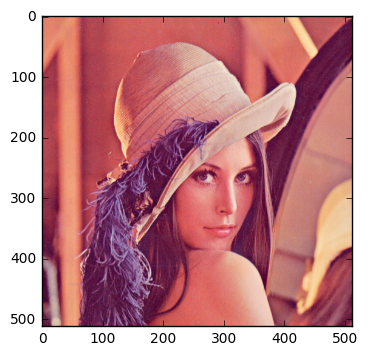

In [12]:
plt.imshow(RGB)
# print(RGB)

\# Compute (and plot) the histograms of the image using [`cv2.calcHist()`](http://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html).

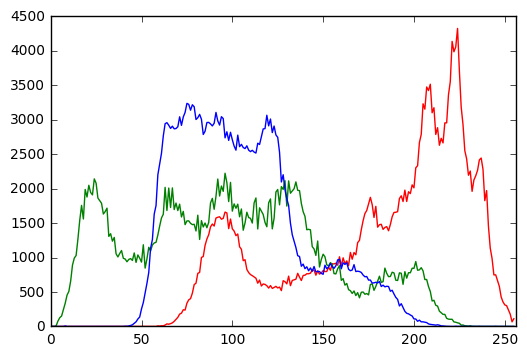

In [22]:
components = ('r','g','b')
histr = [None for col in components]
for i,com in enumerate(components):
    histr[i] = cv2.calcHist([RGB],[i],None,[256],[0,256])
    plt.plot(histr[i], color = com)
plt.xlim([0,256])
plt.show()

\# We can see each color component independently. Note: by default, [`matplotlib`](http://matplotlib.org/api/pyplot_summary.html) shows the images using color (when color information is available) or en pseudo-color (when color information is not available). This behaviour is controlled by the `cmap` parameter. See also how to [plot several images together](http://matplotlib.org/examples/pylab_examples/multi_image.html).

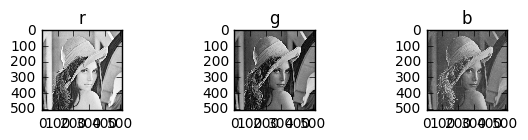

In [23]:
fig = plt.figure()

a=fig.add_subplot(1,5,1)
col = "r"
a.set_title(col)
imgplot = plt.imshow(RGB[:,:,0], cmap='gray')

a=fig.add_subplot(1,5,3)
col = "g"
a.set_title(col)
imgplot = plt.imshow(RGB[:,:,1], cmap='gray')#for col in colors:

a=fig.add_subplot(1,5,5)
col = "b"
a.set_title(col)
imgplot = plt.imshow(RGB[:,:,2], cmap='gray')#for col in colors:


#    fig.
#    plt.imshow(RGB[:,:,0],cmap='blue') # Red

In [24]:
def show_component(RGB_image, component):
    I = np.ndarray((RGB_image.shape[0], RGB_image.shape[1], 3), 'uint8')
    I[:,:,:] = 0
    I[:,:,component] = RGB_image[:,:,component]
    plt.imshow(I)

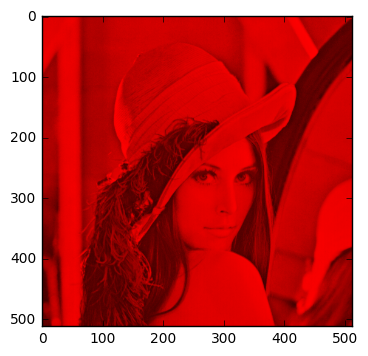

In [25]:
show_component(RGB, 0)

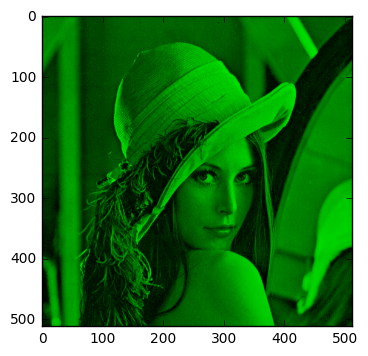

In [26]:
show_component(RGB, 1)

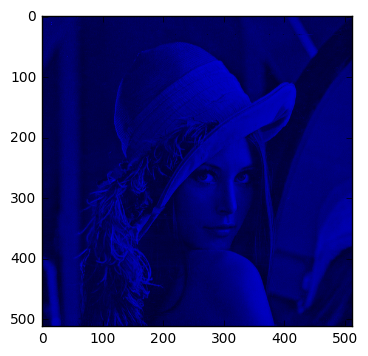

In [27]:
show_component(RGB, 2)

\# Convert the image from the RGB to the YBcBr (JPEG) [color space](http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor).

In [28]:
YCbCr = cv2.cvtColor(RGB, cv2.COLOR_RGB2YCrCb)

(512, 512, 3)


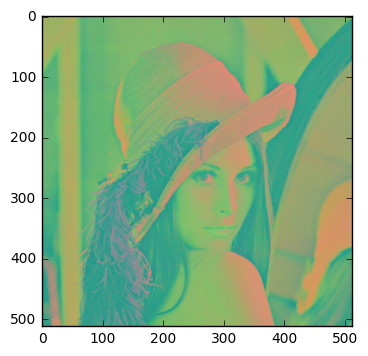

In [29]:
plt.imshow(YCbCr)
print(YCbCr.shape)

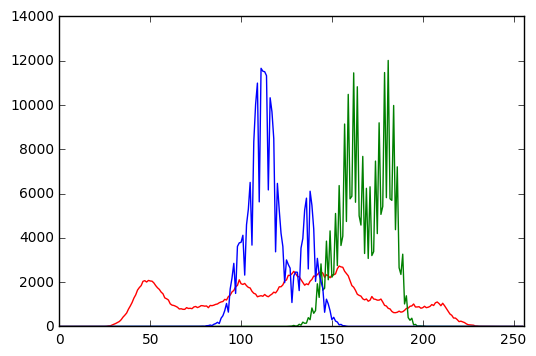

In [30]:
histr = [None for com in components]
for i,com in enumerate(components):
    histr[i] = cv2.calcHist([YCbCr],[i],None,[256],[0,256])
    plt.plot(histr[i], color = com)
plt.xlim([0,256])
plt.show()

\# By default, [`matplotlib`](http://matplotlib.org/api/pyplot_summary.html) shows the images using color (when color information is available) or en pseudo-color (when color information is not available). This behaviour is controlled by the `cmap` parameter. The following commands show each component in a different image.

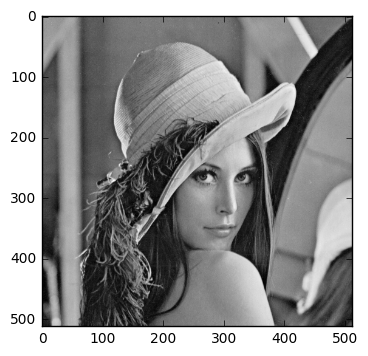

In [31]:
plt.imshow(YCbCr[:,:,0], cmap='gray') # Shows Y (luma)

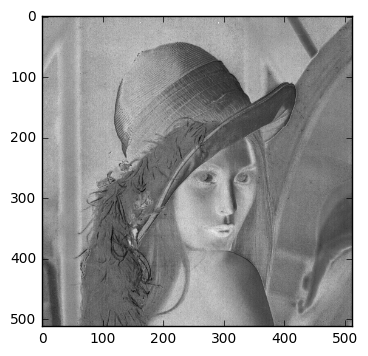

In [32]:
plt.imshow(YCbCr[:,:,1], cmap='gray') # Shows Cb

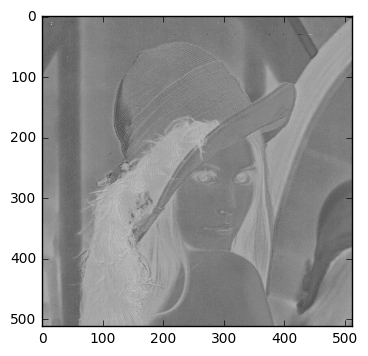

In [33]:
plt.imshow(YCbCr[:,:,2], cmap='gray') # Shows Cr

\# [The human visual system is less sensitive to the position and motion of color than luminance](https://en.wikipedia.org/wiki/Chroma_subsampling).